# Introduction
Dans cette étude, on réalise une analyse bidimensionnelle sur les avis consommateurs recueillis à partir d’une plate-forme de commerce électronique de vêtements pour femmes « anonymisée » pour optimiser la gestion de la relation client.
En effet, la base de données comporte des données textuelles et numériques, et en vue d’établir la meilleure approche pour répondre à notre objectif, il est important de mettre à profit ces ressources sous leurs différentes formes.
C’est pour cela que l’analyse se fera donc simultanément suivant les techniques d’EDA (Analyse de Données Exploratoire) pour les données numériques et de traitement du langage naturel pour les données textuelles dans un environnement Python. Ces deux analyses sont non-négligeables et complémentaires dans leurs résultats.
L’Analyse de donnée exploratoire est une technique d’études qui regroupe l’ensemble des méthodes statistique à caractère multidimensionnelles et descriptives. Elle permet de traiter un grand nombre de données en tenant compte et en comparant plusieurs variables afin de mettre en évidence des structures systémiques entre les différentes données.


# Statistique descriptive uni-variée
Pour débuter cette étude, on analyse à la distribution des variables uni-variées. On entend par statistique descriptive uni-variée lorsque les données ne sont ne sont relatives qu’à une seule variable.


In [3]:
# General
import numpy as np
import pandas as pd
import nltk
import random
import os
from os import path
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from subprocess import check_output


# Set Plot Theme
sns.set_palette([
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
])
# Alternate # plt.style.use('fivethirtyeight')

# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer

# Modeling
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.util import ngrams
from collections import Counter


# Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Read and Peak at Data
df = pd.read_csv(r'C:\\Users\\LENOVO\\Desktop\\Womens Clothing E-Commerce Reviews.csv')
df.drop(df.columns[0],inplace=True, axis=1)

# Delete missing observations for following variables
for x in ["Division Name","Department Name","Class Name","Review Text"]:
    df = df[df[x].notnull()]

# Extracting Missing Count and Unique Count by Column
unique_count = []
for x in df.columns:
    unique_count.append([x,len(df[x].unique()),df[x].isnull().sum()])

# Missing Values
print("Valeurs Manquantes: {}".format(df.isnull().sum().sum()))

# Data Dimensions
print("Dimension du DataFrame: {} Rows, {} Columns".format(*df.shape))

# Create New Variables: 
# Word Length
df["Word Count"] = df['Review Text'].str.split().apply(len)
# Character Length
df["Character Count"] = df['Review Text'].apply(len)
# Boolean for Positive and Negative Reviews
df["Label"] = 0
df.loc[df.Rating >= 3,["Label"]] = 1

Valeurs Manquantes: 2966
Dimension du DataFrame: 22628 Rows, 10 Columns


In [5]:
df.sample(3)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Word Count,Character Count,Label
17475,1113,63,Great find!,I love this vest! it's perfect for day and dre...,5,1,1,General,Jackets,Outerwear,16,80,1
8879,1020,60,Back to denim,Great denim color and fit. gives a nice feel t...,5,1,1,General,Bottoms,Skirts,12,58,1
17714,872,48,NaN,"I love this tee, the fabric is very comfortabl...",5,1,0,General Petite,Tops,Knits,18,91,1


# Calcul des valeurs manquantes

In [6]:
print("Dataframe Dimension: {} Rows, {} Columns".format(*df.shape))
pd.DataFrame(unique_count, columns=["Column","Unique","Missing"]).set_index("Column").T

Dataframe Dimension: 22628 Rows, 13 Columns


Column,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
Unique,1172,77,13984,22621,5,2,82,3,6,20
Missing,0,0,2966,0,0,0,0,0,0,0


# Paramètres statistiques (Moyenne, Médiane, écart-type) 

In [7]:
df.describe().T.drop("count",axis=1)

,mean,std,min,25%,50%,75%,max
Clothing ID,919.695908,201.683804,1.0,861.0,936.0,1078.0,1205.0
Age,43.282880,12.328176,18.0,34.0,41.0,52.0,99.0
Rating,4.183092,1.115911,1.0,4.0,5.0,5.0,5.0
Recommended IND,0.818764,0.385222,0.0,1.0,1.0,1.0,1.0
Positive Feedback Count,2.631784,5.787520,0.0,0.0,1.0,3.0,122.0
Word Count,60.211950,28.533053,2.0,36.0,59.0,88.0,115.0
Character Count,308.761534,143.934126,9.0,186.0,302.0,459.0,508.0
Label,0.895263,0.306222,0.0,1.0,1.0,1.0,1.0


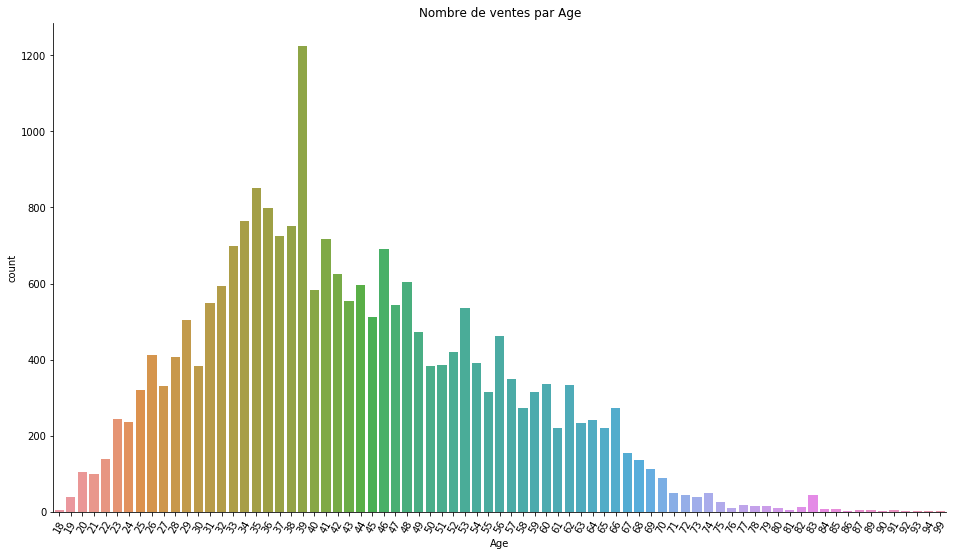

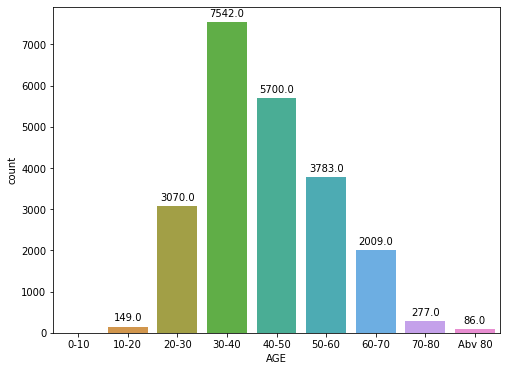

In [12]:
#Nombre de commentaires par age 

plt.figure(figsize = (16, 9))
sns.countplot(x = 'Age', data = df)
plt.xticks(rotation = 60)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.title('Nombre de ventes par Age')
plt.show()

df['AGE']= pd.cut(df['Age'],[0,10,20,30,40,50,60,70,80,90], labels=['0-10','10-20','20-30','30-40','40-50','50-60','60-70','70-80','Abv 80'])
plt.figure(figsize = (8, 6))
splot=sns.countplot(x='AGE',data=df)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')